In [1]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm


from datetime import datetime

import pandas_datareader.data as web

In [2]:
start = datetime(2007, 6, 15)
end = datetime(2022, 7, 15)

data = [
    "DGS1MO",
    "DGS3MO",
    "DGS1",
    "DGS2",
    "DGS5",
    "DGS7",
    "DGS10",
    "DGS30"
]

data = web.DataReader(data, "fred", start, end).dropna(how="all").ffill()
data.index = data.index.strftime('%d/%m/%Y')
data

DGS1MO  DGS3MO  DGS1  DGS2  DGS5  DGS7  DGS10  DGS30
DATE                                                            
15/06/2007    4.46    4.56  4.93  5.05  5.10  5.12   5.16   5.26
18/06/2007    4.47    4.63  4.95  5.01  5.07  5.10   5.15   5.26
19/06/2007    4.44    4.65  4.92  4.94  5.00  5.03   5.09   5.20
20/06/2007    4.42    4.74  4.97  4.97  5.05  5.09   5.14   5.24
21/06/2007    4.17    4.70  4.96  4.98  5.06  5.10   5.16   5.28
...            ...     ...   ...   ...   ...   ...    ...    ...
11/07/2022    1.58    2.18  2.97  3.07  3.05  3.06   2.99   3.18
12/07/2022    1.63    2.22  3.07  3.03  3.01  3.01   2.96   3.13
13/07/2022    1.78    2.39  3.21  3.13  3.02  3.00   2.91   3.08
14/07/2022    1.99    2.40  3.16  3.15  3.06  3.05   2.96   3.11
15/07/2022    1.98    2.37  3.12  3.13  3.05  3.03   2.93   3.10

[3774 rows x 8 columns]

In [3]:
date = np.tile(np.arange(data.shape[0]),(8,1)).transpose()

maturity = np.array([[0, 10, 20, 30, 40, 50, 60, 70]]*data.shape[0])

interest_rate = []
for row in data.iterrows():
    interest_rate.append(list(row[1]))
interest_rate = np.array(interest_rate)

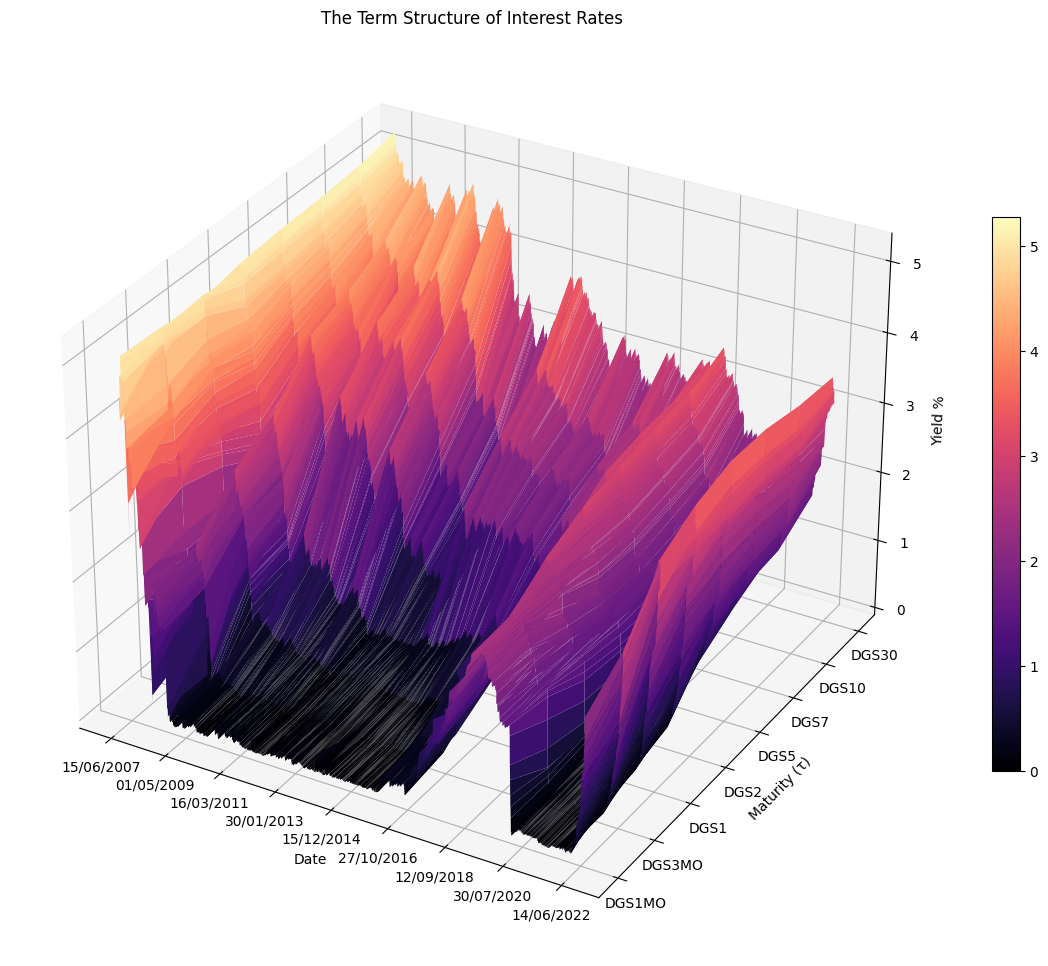

In [4]:
%matplotlib inline

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')
cs = ax.plot_surface(date, maturity, interest_rate, rstride=2, cstride=1, cmap='magma', vmin=np.nanmin(interest_rate), vmax=np.nanmax(interest_rate))
ax.set_title('The Term Structure of Interest Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Maturity (\u03C4)')
ax.set_zlabel('Yield %')
positions = [0, 10, 20, 30, 40, 50, 60, 70]
labels = list(data.columns)
ax.yaxis.set_major_locator(ticker.FixedLocator(positions))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(labels))

positions = [0, 469, 938, 1407, 1876, 2345, 2814, 3283, 3752]
labels = [data.index[0], data.index[469], data.index[938], data.index[1407], data.index[1876], data.index[2345], data.index[2814], data.index[3283], data.index[3752]]
ax.xaxis.set_major_locator(ticker.FixedLocator(positions))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(labels))

m = cm.ScalarMappable(cmap=cm.magma)
m.set_array(interest_rate)
plt.colorbar(cs, shrink=0.6)
plt.show()

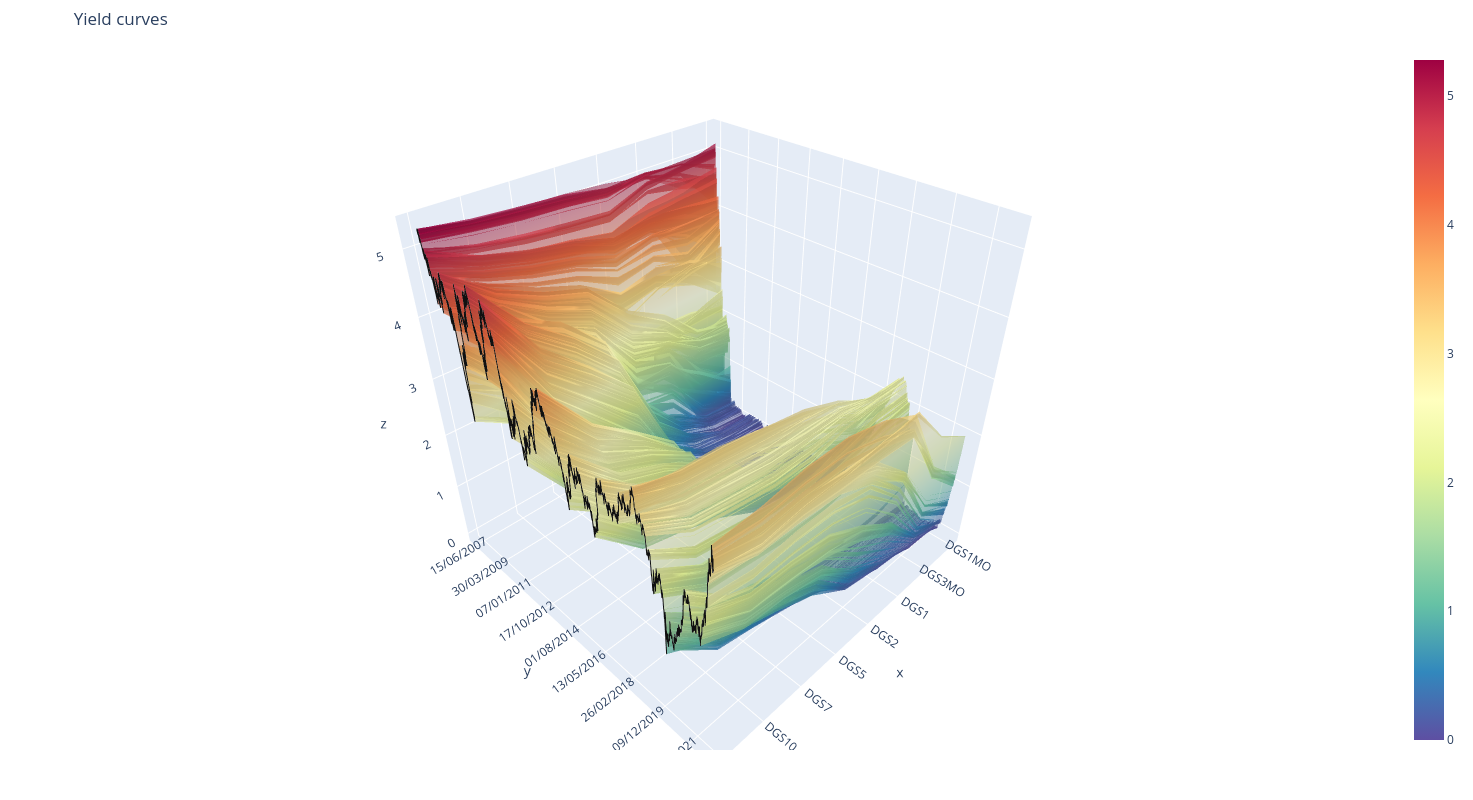

In [5]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=data.values, y=data.index, x=data.columns, opacity = 0.5, colorscale = "Spectral_r")])

fig.update_layout(title='Yield curves', autosize=False,
                  width=1000, height=800,
                  margin=dict(l=50, r=50, b=50, t=50)
                 )
x = np.array([data.columns[-1]]*len(data.index))
y = np.array(data.index)
z = np.array(data.values[:,-1])

line_marker = dict(color='#101010', width=2)
fig.add_scatter3d(x=x, y=y,z=z, mode='lines', line=line_marker, name='')
fig.show()